In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv('C:/Users/claud/Downloads/titanic.csv', sep = ';')

In [3]:
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})

In [ ]:
X = titanic[['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']]
y = titanic['Survived']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

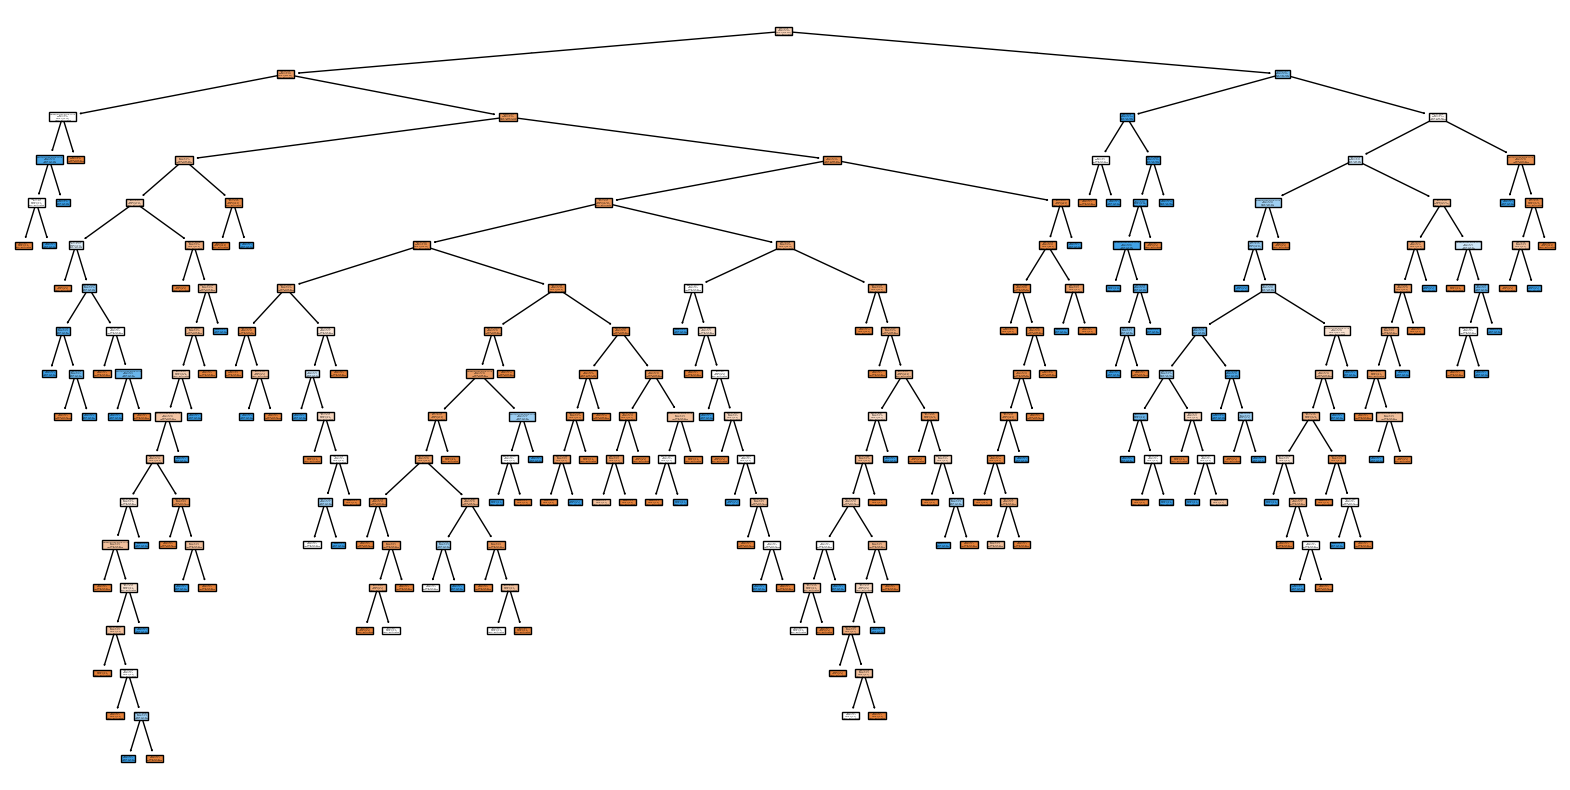

In [7]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.show()

In [8]:
from sklearn.metrics import accuracy_score

# Predecir en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión
precision = accuracy_score(y_test, y_pred)

print(f'Precisión del modelo: {precision * 100:.2f}%')

Precisión del modelo: 78.28%


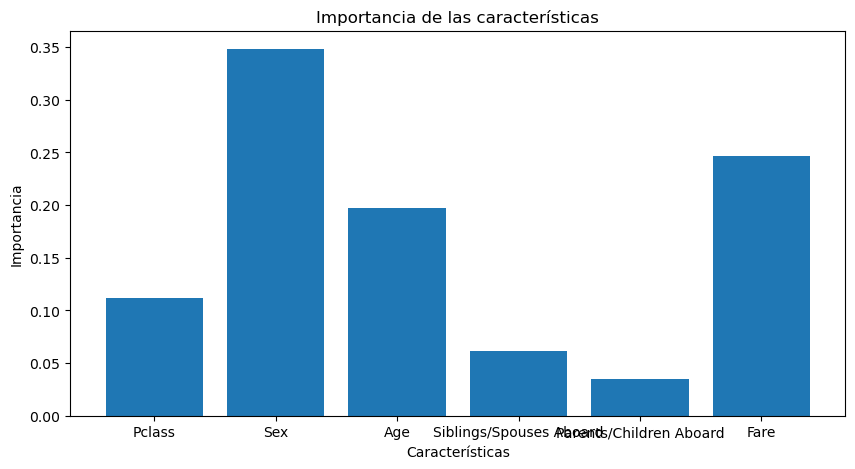

In [9]:
importances = clf.feature_importances_

plt.figure(figsize=(10, 5))
plt.bar(X.columns, importances)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las características')
plt.show()


la variable sex es la mas importante, ya que el genero puede influir significativamente en la supervivencia del titanic.

fare y age tmbn tiene una relevancia considerable

las demas tienen mas bajas, sobretodo parents / children abroad, asi que voy a eliminar esa y sibling spouses, y volverlo a graficar

In [67]:
X_reduced = titanic[['Pclass', 'Sex', 'Age', 'Fare', 'Siblings/Spouses Aboard']]

# Dividir nuevamente los datos
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# Entrenar el árbol de decisión con el conjunto reducido
clf_reduced = DecisionTreeClassifier()
clf_reduced.fit(X_train_reduced, y_train)

# Calcular la nueva precisión
y_pred_reduced = clf_reduced.predict(X_test_reduced)
precision_reduced = accuracy_score(y_test, y_pred_reduced)

print(f'Precisión del modelo (con características reducidas): {precision_reduced * 100:.2f}%')

Precisión del modelo (con características reducidas): 78.28%


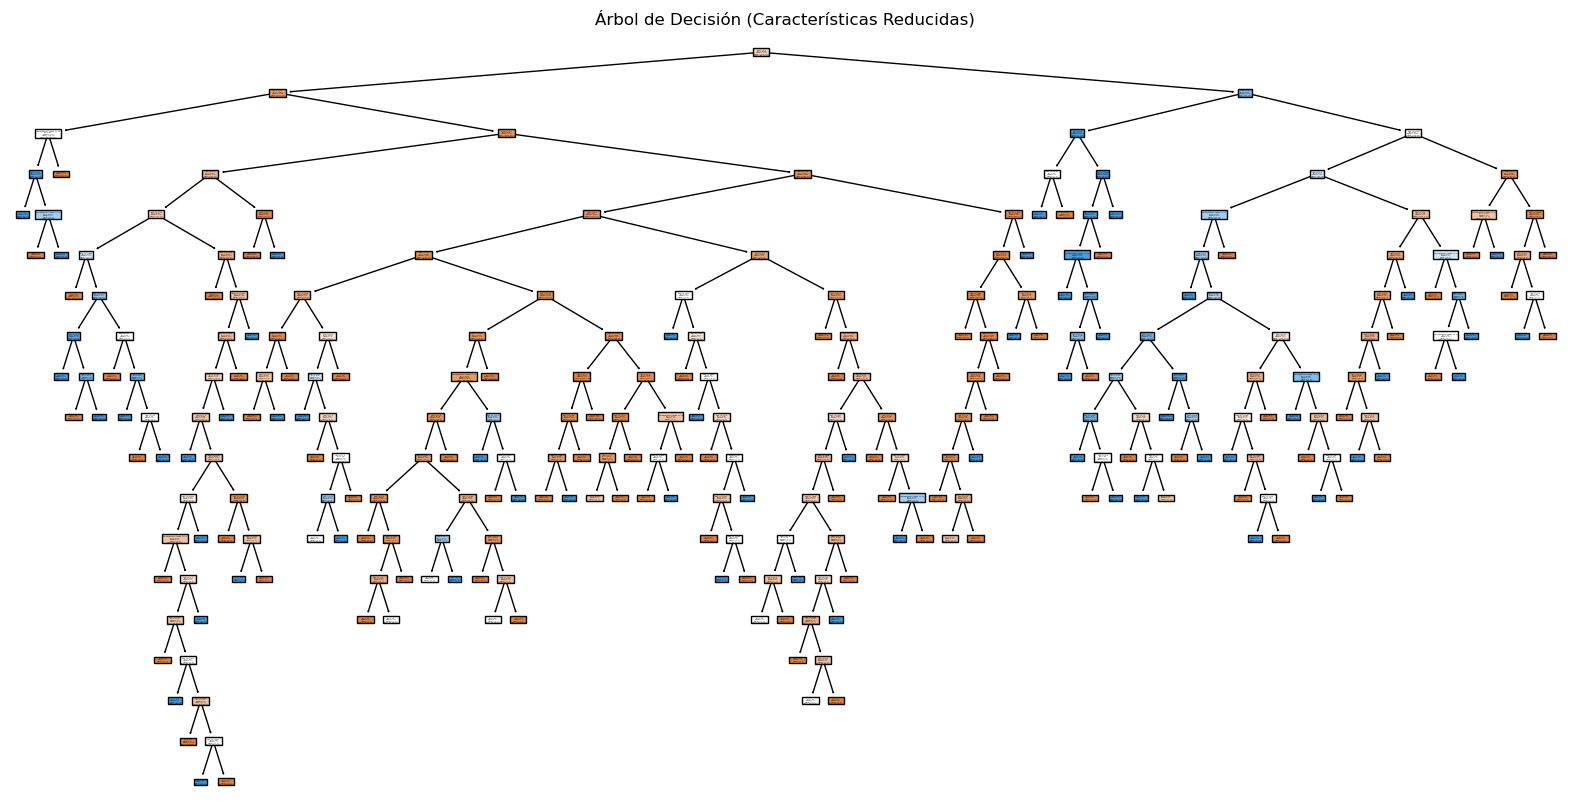

In [68]:
plt.figure(figsize=(20, 10))
tree.plot_tree(clf_reduced, filled=True, feature_names=X_reduced.columns, class_names=['Not Survived', 'Survived'])
plt.title("Árbol de Decisión (Características Reducidas)")
plt.show()